### Comparing coesa62 and coesa76
Also known as U.S. Standard Atmosphere, the atmospheric model coesa76 is just an update of its little brother coesa62. The difference is that geopotential heights diverge for higher altitudes.

Let us plot the Temperature as increasing altitude for both atmospheric models:

In [1]:
from astropy import units as u

from matplotlib import pyplot as plt
import numpy as np

from poliastro.earth.atmosphere import COESA62, COESA76

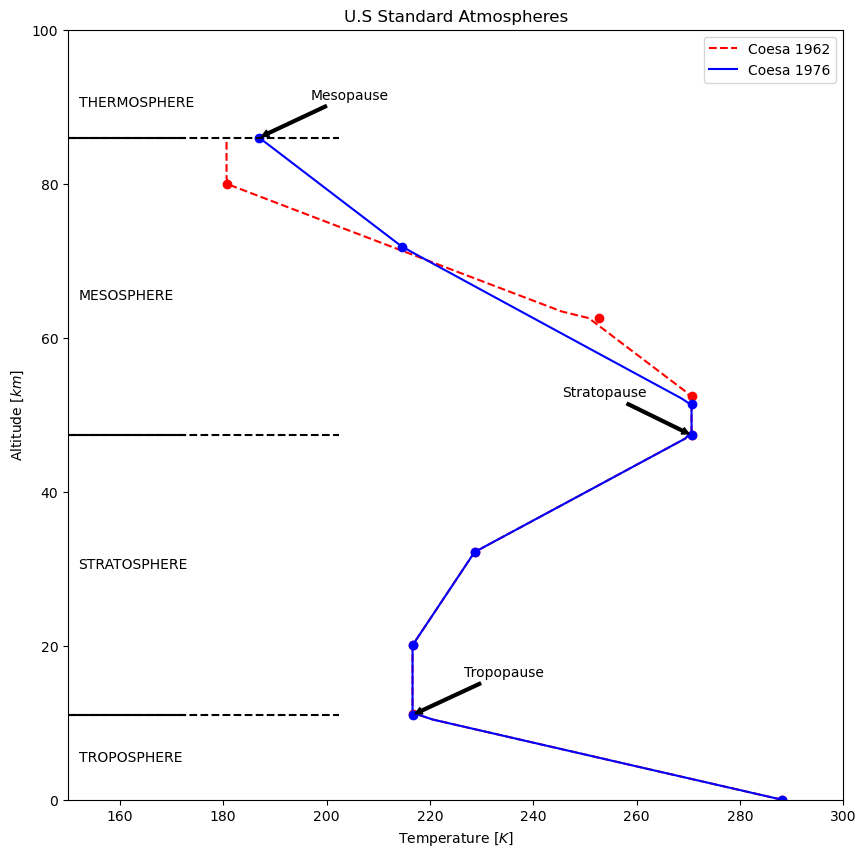

In [2]:
# We build the atmospheric instances
coesa62 = COESA62()
coesa76 = COESA76()

# Create the figure
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("U.S Standard Atmospheres")

# Collect all atmospheric models and define their plotting properties
atm_models = {
    coesa62: ["--r", "r", "Coesa 1962"],
    coesa76: ["-b", "b", "Coesa 1976"],
}

# Solve atmospheric temperature for each of the models
for atm in atm_models:
    z_span = np.linspace(0, 86, 100) * u.km
    T_span = np.array([]) * u.K
    for z in z_span:
        # We discard density and pressure
        T = atm.temperature(z)
        T_span = np.append(T_span, T)

    # Temperature plot
    ax.plot(T_span, z_span, atm_models[atm][0], label=atm_models[atm][-1])
    ax.plot(atm.Tb_levels[:8], atm.zb_levels[:8], atm_models[atm][1] + "o")
    ax.set_xlim(150, 300)
    ax.set_ylim(0, 100)
    ax.set_xlabel("Temperature $[K]$")
    ax.set_ylabel("Altitude $[km]$")
    ax.legend()

# Add some information on the plot
ax.annotate(
    "Tropopause",
    xy=(coesa76.Tb_levels[1].value, coesa76.zb_levels[1].value),
    xytext=(coesa76.Tb_levels[1].value + 10, coesa76.zb_levels[1].value + 5),
    arrowprops=dict(arrowstyle="simple", facecolor="black"),
)
ax.annotate(
    "Stratopause",
    xy=(coesa76.Tb_levels[4].value, coesa76.zb_levels[4].value),
    xytext=(coesa76.Tb_levels[4].value - 25, coesa76.zb_levels[4].value + 5),
    arrowprops=dict(arrowstyle="simple", facecolor="black"),
)
ax.annotate(
    "Mesopause",
    xy=(coesa76.Tb_levels[7].value, coesa76.zb_levels[7].value),
    xytext=(coesa76.Tb_levels[7].value + 10, coesa76.zb_levels[7].value + 5),
    arrowprops=dict(arrowstyle="simple", facecolor="black"),
)

# Layers in the atmosphere
for h in [11.019, 47.350, 86]:
    ax.axhline(h, color="k", linestyle="--", xmin=0.0, xmax=0.35)
    ax.axhline(h, color="k", linestyle="-", xmin=0.0, xmax=0.15)

layer_names = {
    "TROPOSPHERE": 5,
    "STRATOSPHERE": 30,
    "MESOSPHERE": 65,
    "THERMOSPHERE": 90,
}
for name in layer_names:
    ax.annotate(
        name,
        xy=(152, layer_names[name]),
        xytext=(152, layer_names[name]),
    )

### Temperature, pressure and density distributions
One of the advantages of COESA76 is that it extends up to 1000 kilometers. The behaviour of previous magnitudes against geometrical altitude can be checked in the following figure. A logarithmic scale is applied for pressure and density to better see their decay for high altitude values:

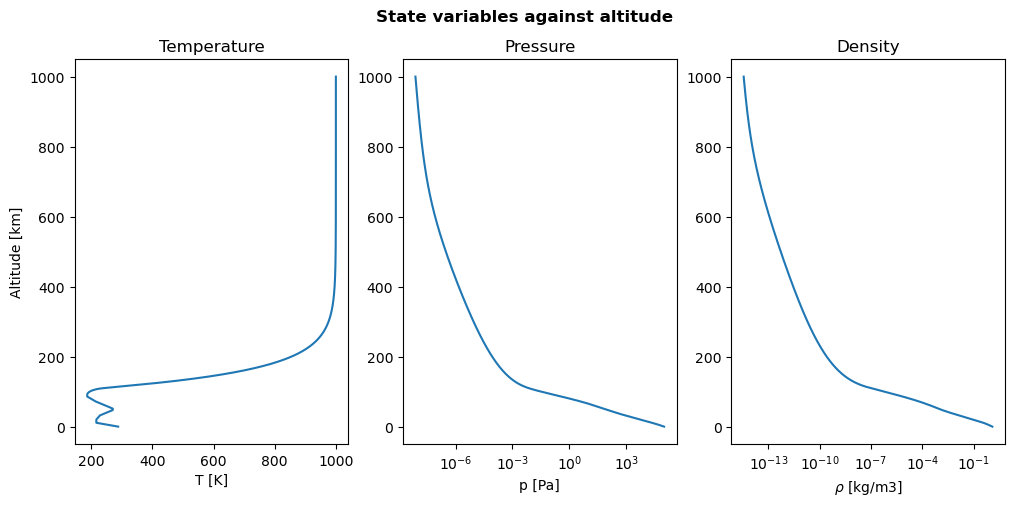

In [13]:
# We create the basis for the figure
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
fig.suptitle("State variables against altitude", fontweight="bold")

# Complete altitude range and initialization of state variables sets
alt_span = np.linspace(0, 1000, 1001) * u.km
T_span = np.array([]) * u.K
p_span = np.array([]) * u.Pa
rho_span = np.array([]) * u.kg / u.m**3

# We solve for each property at given altitude
for alt in alt_span:
    T, p, rho = coesa76.properties(alt)
    T_span = np.append(T_span, T)
    p_span = np.append(p_span, p.to(u.Pa))
    rho_span = np.append(rho_span, rho)

# Temperature plot
axs[0].set_title("Temperature")
axs[0].set_xlabel("T [K]")
axs[0].set_ylabel("Altitude [km]")
axs[0].plot(T_span, alt_span)

# Pressure plot
axs[1].set_title("Pressure")
axs[1].set_xlabel("p [Pa]")
axs[1].plot(p_span, alt_span)
axs[1].set_xscale("log")

# Density plot
axs[2].set_title("Density")
axs[2].set_xlabel(r"$\rho$ [kg/m3]")
axs[2].plot(rho_span, alt_span)
axs[2].set_xscale("log")